# Import Library

In [9]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics, preprocessing
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

# 시작

In [2]:
cwd = os.getcwd()
print('현재 폴더 경로 : ', cwd)
# 폴더 위치 변경
os.chdir("C:\\Users\hyunj\\Dropbox\\종합설계프로젝트\\중요\\데이터")
print('변경 후 폴더 경로 : ', cwd)
print('현재 폴더 파일 : ', os.listdir())
data = pd.read_csv('Data.csv', encoding='CP949')
print('feature 항목 : ', data.columns)
data

현재 폴더 경로 :  c:\Users\hyunj\Desktop\종합설계프로젝트
변경 후 폴더 경로 :  c:\Users\hyunj\Desktop\종합설계프로젝트
현재 폴더 파일 :  ['Block perspective.xlsx', 'CHE I perspective.xlsx', 'CHE II perspective.xlsx', 'Container perspective.xlsx', 'ContainerPersp.csv', 'ContainerPerspectiv_DStoLD.csv', 'Data.csv', 'FULL', 'Gate perspective.xlsx', 'hanjin.csv', 'ITV perspective.xlsx', 'POD', 'QC perspective.xlsx', 'Vessel perspective.xlsx', '디스코용 파일.csv', '분포', '분포.csv']
feature 항목 :  Index(['Time of DS-QUAYSIDE', 'Time of DS-MOVE', 'Time of DS-YARDSIDE',
       'ContainerID', 'DS-VESSEL-ID', 'LD-VESSEL-ID', 'DS-VESSEL-YEAR',
       'LD-VESSEL-YEAR', 'LD-POD', 'Full', 'Empty', 'Dwell Time'],
      dtype='object')


,Time of DS-QUAYSIDE,Time of DS-MOVE,Time of DS-YARDSIDE,ContainerID,DS-VESSEL-ID,LD-VESSEL-ID,DS-VESSEL-YEAR,LD-VESSEL-YEAR,LD-POD,Full,Empty,Dwell Time
0,92,479,92,BEAU,MAUO,ALAP,2018,2018,CAVAN,1,0,359405
1,92,518,92,BMOU,MAUO,ALAP,2018,2018,USSEA,1,0,345321
2,92,957,92,BMOU,MAUO,ALAP,2018,2018,USSEA,1,0,344666
3,92,851,92,BMOU,MAUO,ALAP,2018,2018,CAVAN,1,0,347916
4,92,636,92,BMOU,MHAH,ALAP,2018,2018,USSEA,1,0,256699
...,...,...,...,...,...,...,...,...,...,...,...,...
24887,92,855,92,TGHU,SFNZ,SFNZ,2018,2018,CNNGB,0,1,32909
24888,92,576,92,TGHU,SFNZ,SFNZ,2018,2018,CNNGB,0,1,31494
24889,92,237,92,TGHU,SFNZ,SFNZ,2018,2018,CNSHA,0,1,36648
24890,92,476,92,TRLU,SFNZ,SFNZ,2018,2018,CNNGB,0,1,35029


In [3]:
data.describe()

,Time of DS-QUAYSIDE,Time of DS-MOVE,Time of DS-YARDSIDE,DS-VESSEL-YEAR,LD-VESSEL-YEAR,Full,Empty,Dwell Time
count,24892.0,24892.000000,24892.0,24892.000000,24892.000000,24892.000000,24892.000000,2.489200e+04
mean,92.0,617.510847,92.0,2017.939217,2017.997911,0.858067,0.141933,4.527736e+05
std,0.0,279.470536,0.0,0.238936,0.045659,0.348989,0.348989,2.984035e+05
min,92.0,9.000000,92.0,2017.000000,2017.000000,0.000000,0.000000,1.400000e+02
25%,92.0,395.000000,92.0,2018.000000,2018.000000,1.000000,0.000000,2.503005e+05
50%,92.0,631.000000,92.0,2018.000000,2018.000000,1.000000,0.000000,3.968255e+05
75%,92.0,769.000000,92.0,2018.000000,2018.000000,1.000000,0.000000,6.297435e+05
max,92.0,14215.000000,92.0,2018.000000,2018.000000,1.000000,1.000000,2.595729e+06


In [4]:
# Label Encodering
features = [x for x in data.columns if x not in ['Time of DS-QUAYSIDE', 'Time of DS-MOVE', 'Time of DS-YARDSIDE', "Dwell Time"]]
features

['ContainerID',
 'DS-VESSEL-ID',
 'LD-VESSEL-ID',
 'DS-VESSEL-YEAR',
 'LD-VESSEL-YEAR',
 'LD-POD',
 'Full',
 'Empty']

In [5]:
for feature in features:
    lbl_enc = preprocessing.LabelEncoder()
    data[feature] = lbl_enc.fit_transform(data[feature].fillna("-1").astype(str).values)

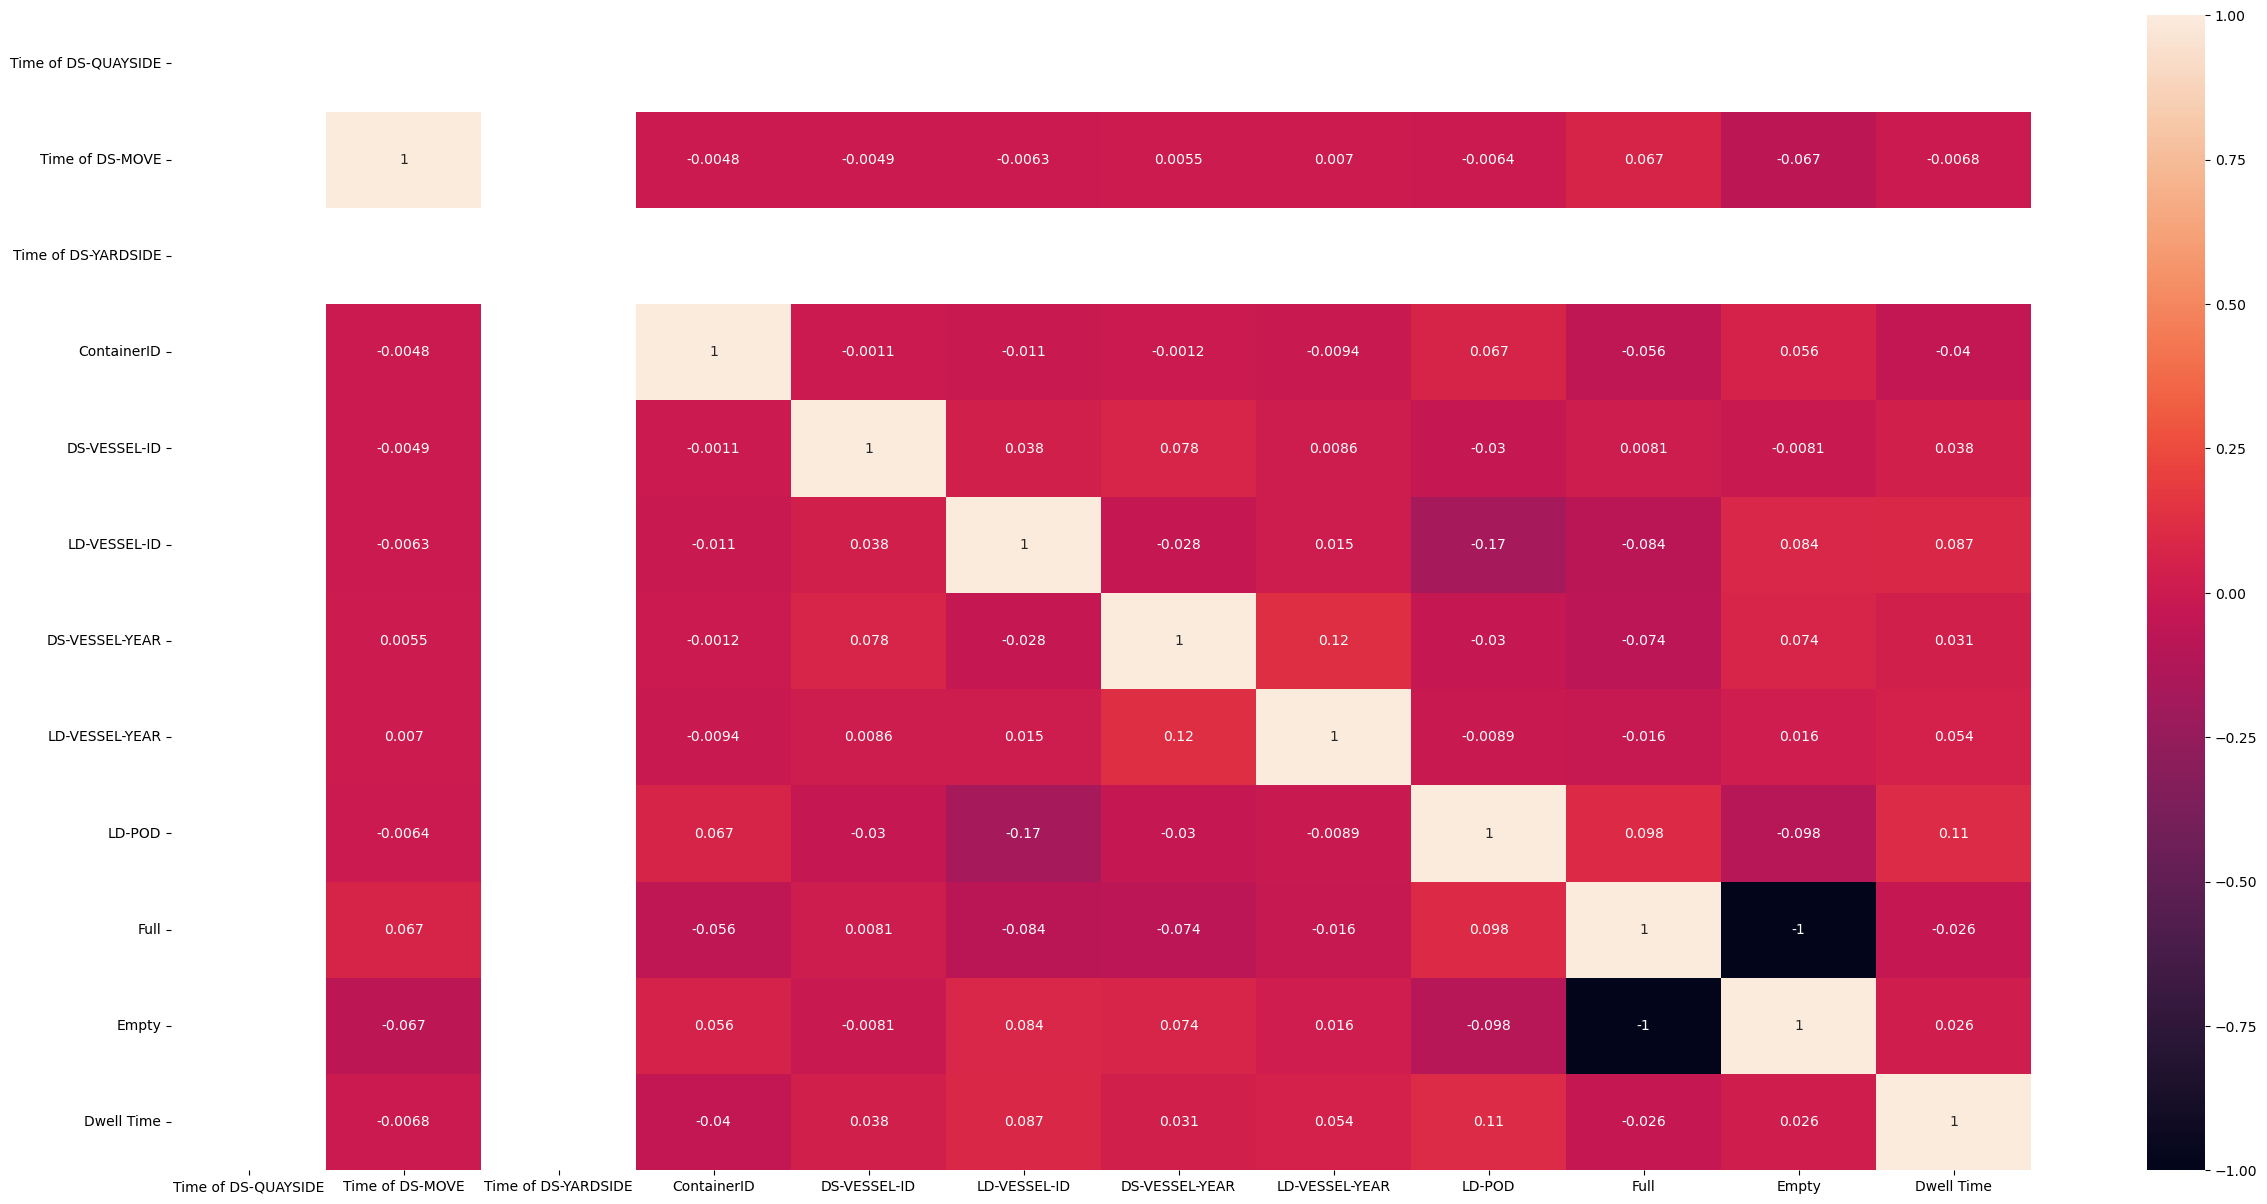

In [6]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [10]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=120)

# 랜덤포레스트 모델 생성
tRF = RandomForestRegressor()
tRF.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error 

# MAE 측정
# MAE_train
y_pred_train = tRF.predict(X_train)
y_pred_test = tRF.predict(X_test)


mae_train = mean_absolute_error(y_train,y_pred_train)
mae_test = mean_absolute_error(y_test,y_pred_test)
print('train_MAE: ',mae_train)
print('test_MAE: ',mae_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Train MSE : ", mse_train)
print("Train RMSE : ", mse_train**0.5)
print("Test MSE : ", mse_test)
print("Test RMSE : ", mse_test**0.5)

r2 = r2_score(y_test, tRF.predict(X_test))
print('테스트 결정계수(R2, 설명력) :', r2)     

train_MAE:  7390.261299203519
test_MAE:  21640.86047079958
Train MSE :  558120854.1683035
Train RMSE :  23624.581565993998
Test MSE :  5706463838.84976
Test RMSE :  75541.14004203114
결정계수(R2, 설명력) : 0.9375111581406642


In [26]:
# 그리드서치
model = RandomForestRegressor()
param = {'criterion':['mae'],'n_estimators':[50, 100, 200],'max_depth':[5,7,9]}
grid = GridSearchCV(model,param_grid=param,cv=10,n_jobs=-1)
grid.fit(X_train,y_train)

# 최적 파라미터 생성
print(f"Best Param : {grid.best_params_}")

c:\Users\hyunj\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


Best Param : {'criterion': 'mae', 'max_depth': 9, 'n_estimators': 200}


In [29]:
# 그리드 서치 결과 확인
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

print("===== GirdSearchCV 확인 =====")
mae_train = mean_absolute_error(y_train,y_pred_train)
mae_test = mean_absolute_error(y_test,y_pred_test)
print('train_MAE: ',mae_train)
print('test_MAE: ',mae_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Train MSE : ", mse_train)
print("Train RMSE : ", mse_train**0.5)
print("Test MSE : ", mse_test)
print("Test RMSE : ", mse_test**0.5)

r2 = r2_score(y_test, grid.predict(X_test))
print('테스트 결정계수(R2, 설명력) :', r2)   

===== GirdSearchCV 확인 =====
train_MAE:  82983.16792020289
test_MAE:  85813.66835157662
Train MSE :  20974546852.911278
Train RMSE :  144825.9191336664
Test MSE :  23318676841.62319
Test RMSE :  152704.5409986985
테스트 결정계수(R2, 설명력) : 0.7446479727769795


In [30]:
scores_df = pd.DataFrame(grid.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]
           

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'criterion': 'mae', 'max_depth': 5, 'n_estima...",0.299366,9,0.298507,0.299602,0.289536
1,"{'criterion': 'mae', 'max_depth': 5, 'n_estima...",0.302876,8,0.295824,0.324389,0.301889
2,"{'criterion': 'mae', 'max_depth': 5, 'n_estima...",0.303949,7,0.289051,0.314478,0.302653
3,"{'criterion': 'mae', 'max_depth': 7, 'n_estima...",0.528388,6,0.503631,0.562394,0.529229
4,"{'criterion': 'mae', 'max_depth': 7, 'n_estima...",0.532584,4,0.517356,0.564869,0.518387
5,"{'criterion': 'mae', 'max_depth': 7, 'n_estima...",0.532231,5,0.512389,0.554662,0.532328
6,"{'criterion': 'mae', 'max_depth': 9, 'n_estima...",0.750909,2,0.763473,0.775097,0.728845
7,"{'criterion': 'mae', 'max_depth': 9, 'n_estima...",0.749192,3,0.760678,0.773187,0.727986
8,"{'criterion': 'mae', 'max_depth': 9, 'n_estima...",0.750911,1,0.763233,0.776032,0.739353


In [31]:
best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("===== Best Model =====")
mae_train = mean_absolute_error(y_train,y_pred_train)
mae_test = mean_absolute_error(y_test,y_pred_test)
print('train_MAE: ',mae_train)
print('test_MAE: ',mae_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Train MSE : ", mse_train)
print("Train RMSE : ", mse_train**0.5)
print("Test MSE : ", mse_test)
print("Test RMSE : ", mse_test**0.5)

r2 = r2_score(y_test, best_model.predict(X_test))
print('테스트 결정계수(R2, 설명력) :', r2)   

===== Best Model =====
train_MAE:  82983.16792020289
test_MAE:  85813.66835157662
Train MSE :  20974546852.911278
Train RMSE :  144825.9191336664
Test MSE :  23318676841.62319
Test RMSE :  152704.5409986985
테스트 결정계수(R2, 설명력) : 0.7446479727769795


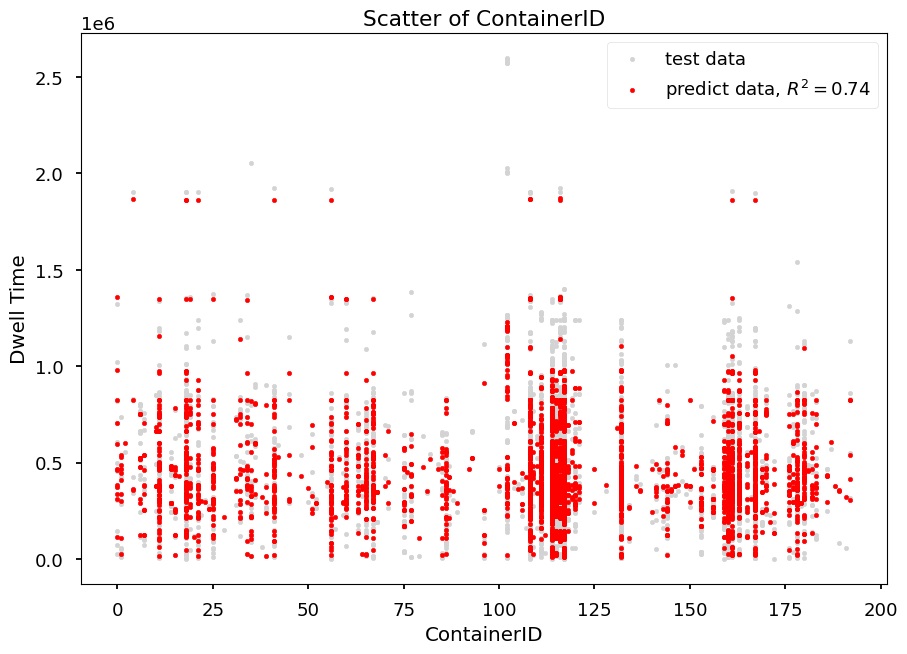

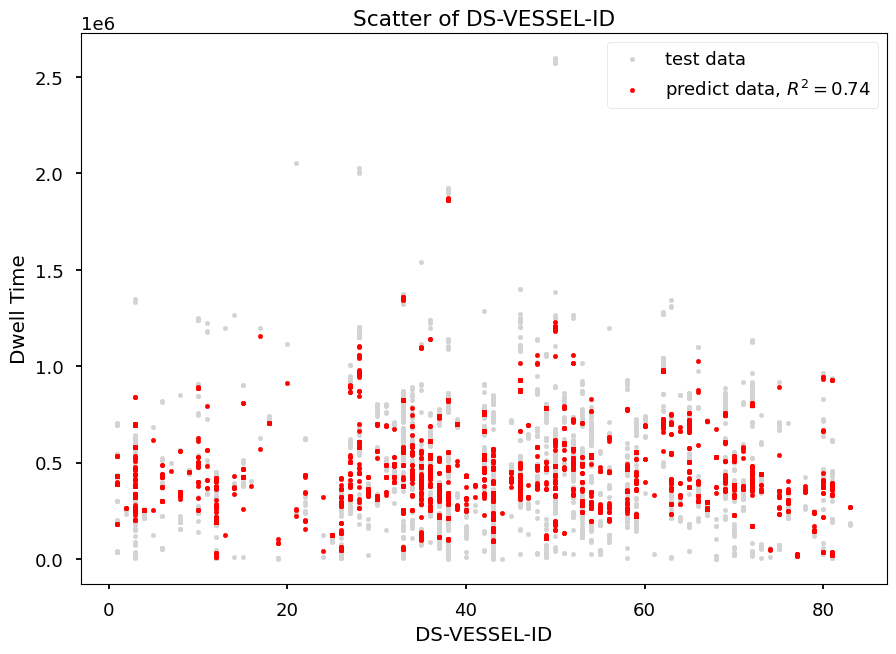

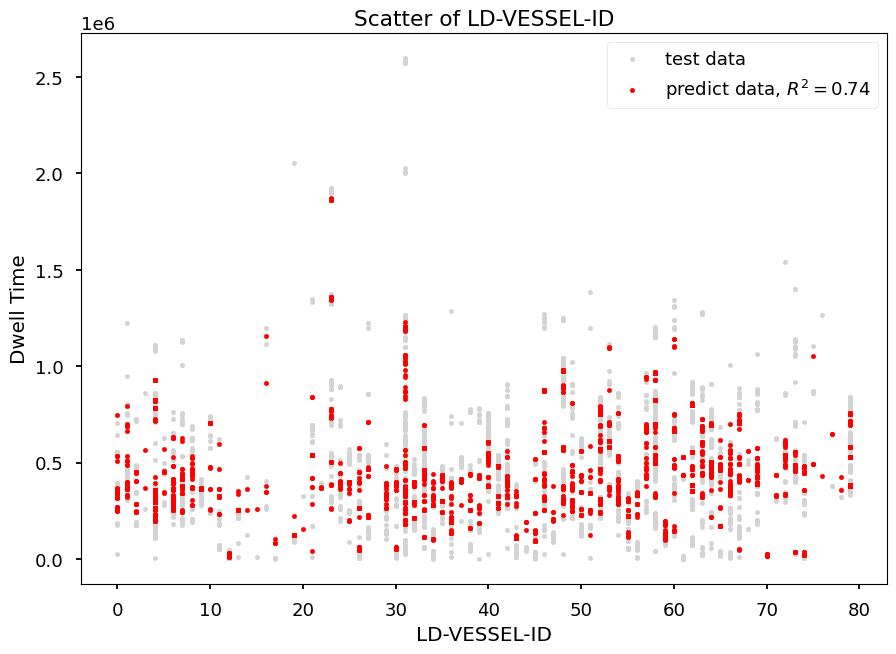

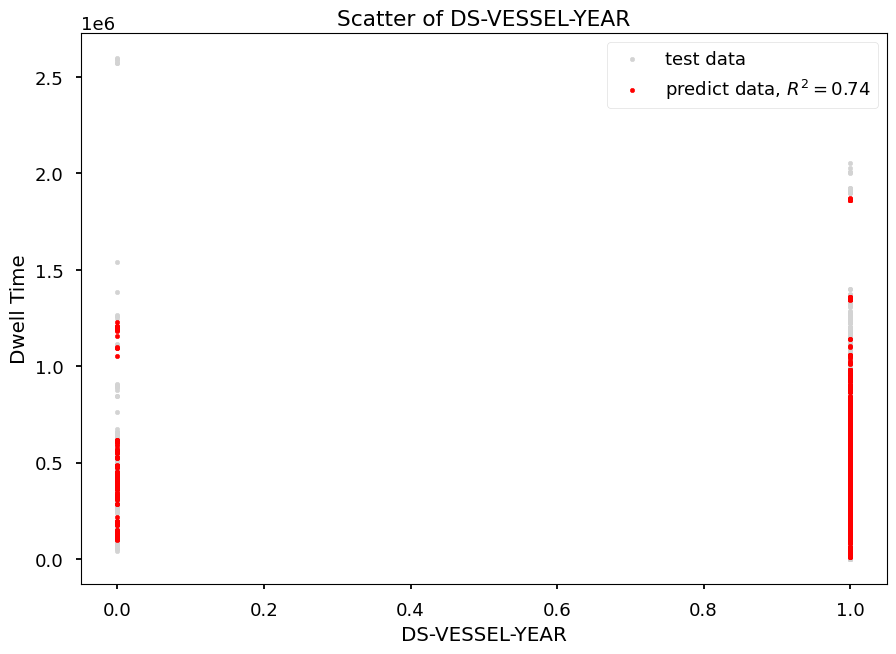

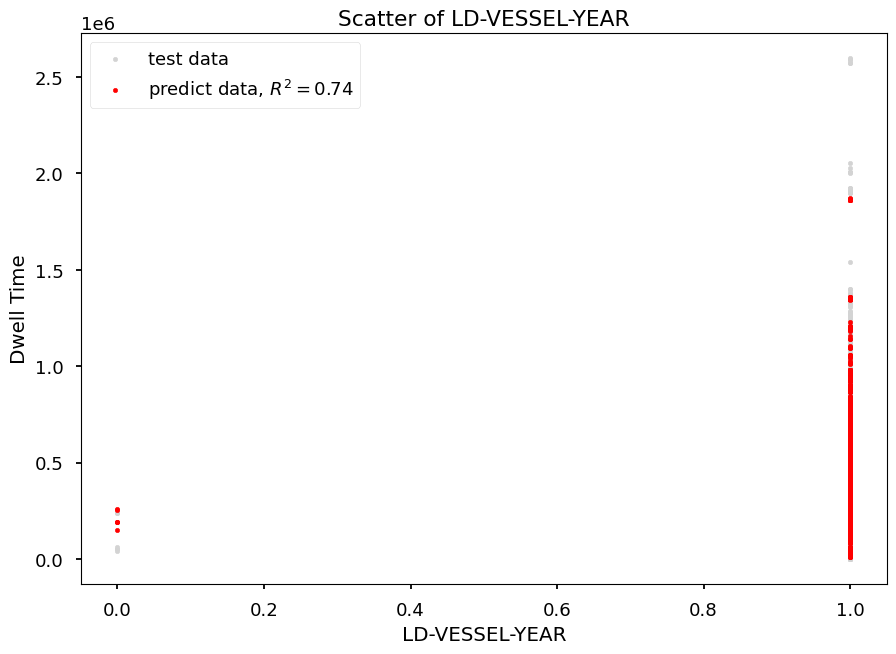

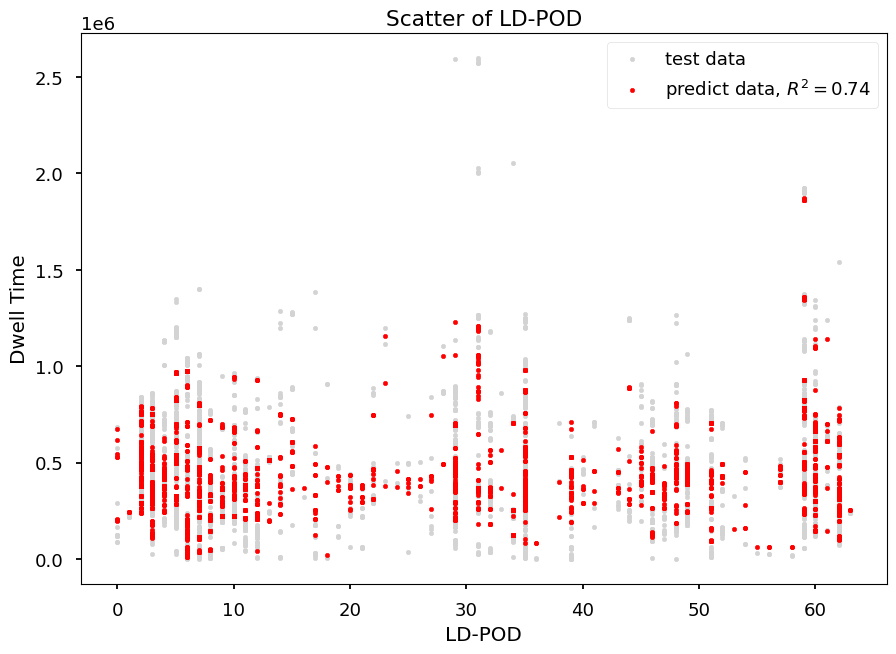

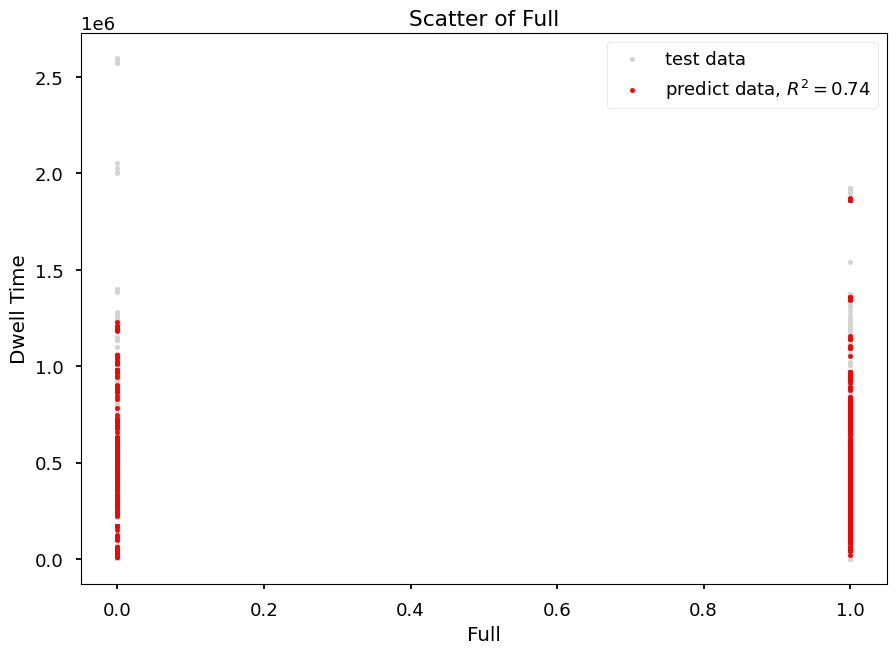

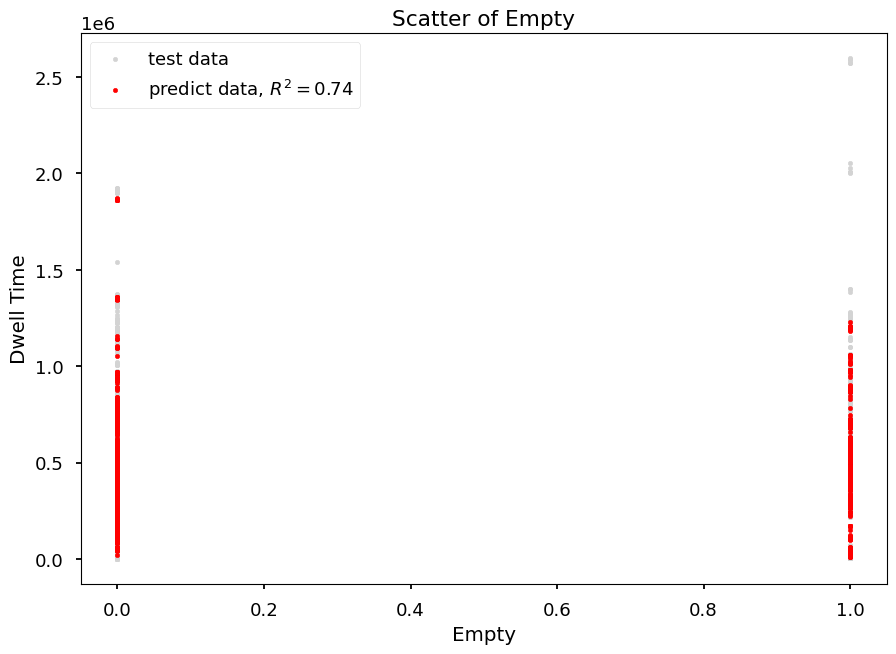

In [32]:
from matplotlib import style 
style.use('seaborn-talk')
for feature in features :
    plt.scatter(X_test[feature], y_test, c='lightgray', label='test data', s = 10)
    plt.scatter(X_test[feature], grid.predict(X_test), c='r', label='predict data, $R^2=%.2f$'%r2, s = 10)
    plt.xlabel(feature)
    plt.title('Scatter of ' + feature)
    plt.ylabel('Dwell Time')
    plt.legend()
    plt.show()

c:\Users\hyunj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
c:\Users\hyunj\Anaconda3\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:1110: UserWarning: Attempting to set identical bottom == top == 452904.2079090615 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])
c:\Users\hyunj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


KeyboardInterrupt: 

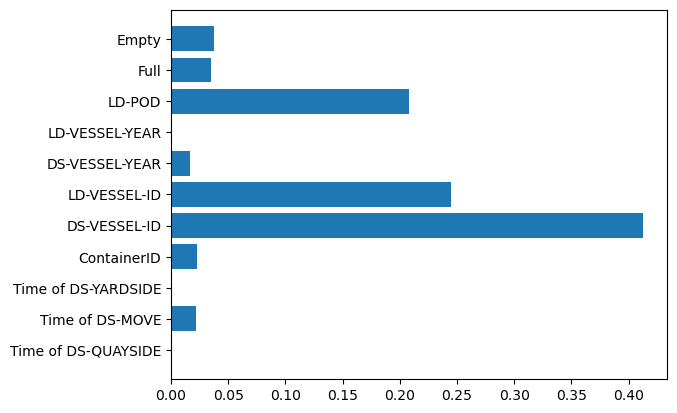

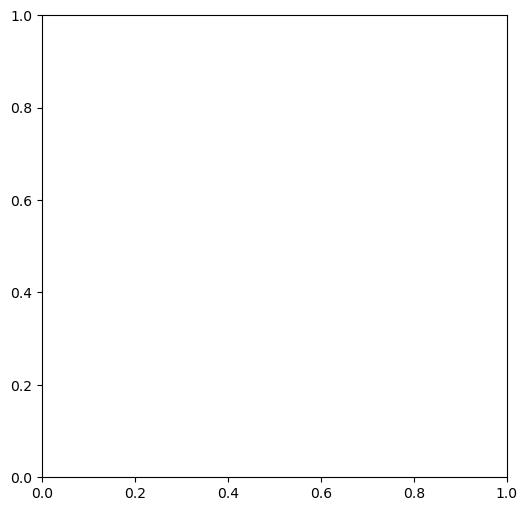

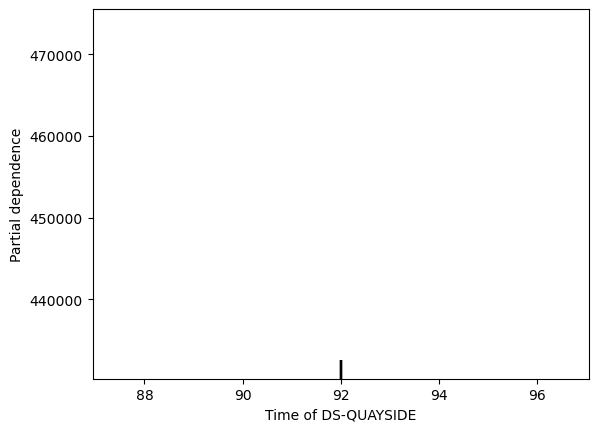

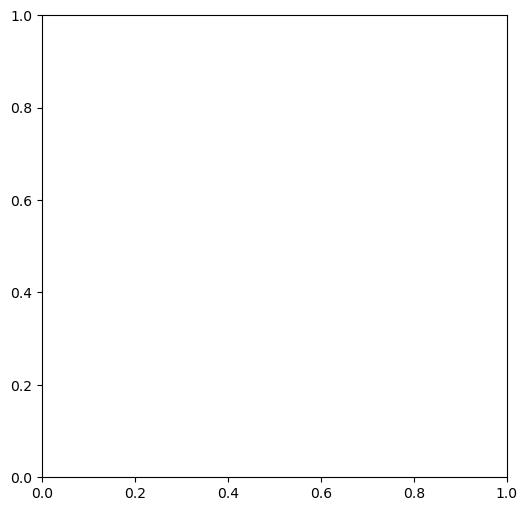

In [ ]:
# 변수중요도
imp = tRF.feature_importances_
imp
len(imp)
colnames = tRF.feature_names_in_
colnames

import matplotlib.pyplot as plt
plt.barh(range(len(imp)), imp)
plt.yticks(range(len(imp)), colnames)

# PDP
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
from matplotlib import pyplot as plt


feature_list = list(X.columns)
for feature in feature_list :
    fig, ax = plt.subplots(figsize=(6, 6))
    plot_partial_dependence(estimator=tRF,X=X,features=[feature],grid_resolution=round(X.shape[0]*0.5),percentiles=(0, 1),kind='average', method='brute')
